<a href="https://colab.research.google.com/github/JakeOh/202007_itw_bd18/blob/master/lab_python/python67_image_crawling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# icrawler 패키지를 사용한 이미지 크롤링(다운로드)

* https://pypi.org/project/icrawler/ 참고
* http://icrawler.readthedocs.io/ 참고

In [1]:
# icrawler 패키지는 Google Colab에 설치되어 있지 않기 때문에, 먼저 설치를 진행해야 함!
!pip install icrawler

In [7]:
# Google Drive 마운트
# 다운로드한 이미지들을 저장할 디렉토리(폴더)를 생성.
import os

default_dir = '/content/drive/My Drive'  # Google Drive
download_dir = os.path.join(default_dir, 'downloads')
bing_dir = os.path.join(download_dir, 'bing')  
# /content/drive/My Drive/downloads/bing
baidu_dir = os.path.join(download_dir, 'baidu')
# /content/drive/My Drive/downloads/baidu

if not os.path.exists(bing_dir):
    os.makedirs(bing_dir)

if not os.path.exists(baidu_dir):
    os.makedirs(baidu_dir)

In [8]:
# MS Bing 이미지 검색 다운로드

# 1) BingImageCrawler 클래스 임포트
from icrawler.builtin import BingImageCrawler

In [9]:
# 2) BingImageCrawler 객체 생성
bing_crawler = BingImageCrawler(storage={'root_dir': bing_dir})

In [10]:
# 3) 생성된 crawler 객체에서 crawl 메서드를 호출
bing_crawler.crawl(keyword='cat', max_num=10)

2020-10-16 07:08:35,121 - INFO - icrawler.crawler - start crawling...
2020-10-16 07:08:35,123 - INFO - icrawler.crawler - starting 1 feeder threads...
2020-10-16 07:08:35,127 - INFO - feeder - thread feeder-001 exit
2020-10-16 07:08:35,128 - INFO - icrawler.crawler - starting 1 parser threads...
2020-10-16 07:08:35,133 - INFO - icrawler.crawler - starting 1 downloader threads...
2020-10-16 07:08:35,470 - INFO - parser - parsing result page https://www.bing.com/images/async?q=cat&first=0
2020-10-16 07:08:35,783 - INFO - downloader - image #1	https://static01.nyt.com/images/2019/09/04/business/04chinaclone-06/04chinaclone-06-superJumbo.jpg
2020-10-16 07:08:36,009 - INFO - downloader - image #2	http://mycatconcierge.com/wp-content/uploads/2018/07/Siberian.jpg
2020-10-16 07:08:36,220 - INFO - downloader - image #3	https://api.time.com/wp-content/uploads/2019/12/CatFilterReaction.jpg
2020-10-16 07:08:36,356 - INFO - downloader - image #4	http://www.odditycentral.com/wp-content/uploads/2017/

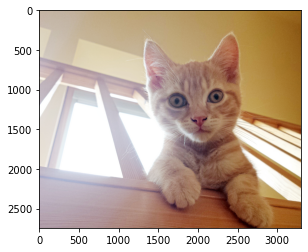

In [13]:
import matplotlib.pyplot as plt
from PIL import Image

img_file = os.path.join(bing_dir, '000003.jpg')
image = Image.open(img_file)
plt.imshow(image)

In [14]:
from icrawler.builtin import BaiduImageCrawler

In [16]:
baidu_crawler = BaiduImageCrawler(storage={'root_dir': baidu_dir},
                                  downloader_threads=4)

In [17]:
baidu_crawler.crawl(keyword='BTS', max_num=100)

2020-10-16 07:22:10,330 - INFO - icrawler.crawler - start crawling...
2020-10-16 07:22:10,331 - INFO - icrawler.crawler - starting 1 feeder threads...
2020-10-16 07:22:10,340 - INFO - feeder - thread feeder-001 exit
2020-10-16 07:22:10,341 - INFO - icrawler.crawler - starting 1 parser threads...
2020-10-16 07:22:10,346 - INFO - icrawler.crawler - starting 4 downloader threads...
2020-10-16 07:22:13,733 - INFO - parser - parsing result page http://image.baidu.com/search/acjson?tn=resultjson_com&ipn=rj&word=BTS&pn=0&rn=30
2020-10-16 07:22:14,887 - INFO - downloader - image #1	http://b-ssl.duitang.com/uploads/item/201811/21/20181121235542_kofjh.jpg
2020-10-16 07:22:15,208 - INFO - downloader - image #2	http://b-ssl.duitang.com/uploads/item/201810/22/20181022223443_sbdpv.jpg
2020-10-16 07:22:15,349 - INFO - downloader - image #3	http://i0.hdslb.com/bfs/archive/5c60d1cf9c7f76b929140e790ed38c4b4c5b69be.jpg
2020-10-16 07:22:15,465 - INFO - downloader - image #4	http://b-ssl.duitang.com/upload

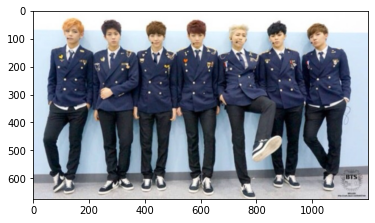

In [24]:
image_file = os.path.join(baidu_dir, '000100.jpeg')
image = Image.open(image_file)
plt.imshow(image)

# BeautifulSoup을 이용한 네이버 이미지 검색, 다운로드

In [25]:
# 이미지들을 저장할 디렉토리 생성
naver_dir = os.path.join(download_dir, 'naver')
if not os.path.exists(naver_dir):
    os.makedirs(naver_dir)

In [72]:
import requests  # request get/post 요청을 보내기 위해서
from urllib.request import urlopen  # URL 주소의 파일을 오픈할 때
from urllib.request import urlretrieve  # URL 주소에 있는 파일을 HDD에 저장할 때
from bs4 import BeautifulSoup  # HTML 분석

In [74]:
def naver_image_downloader(keyword):
    url = 'https://search.naver.com/search.naver?where=image'
    req_params = {'query': keyword}
    # 요청 보냄.
    response = requests.get(url, req_params)
    # print(response)  #> Response [200]
    # 응답 객체에서 HTML 텍스트를 추출.
    html = response.text.strip()
    # print(html[:500])
    # BeautifulSoup 객체를 생성
    soup = BeautifulSoup(markup=html, features='html5lib')
    # print(soup)
    # 이미지 요소들을 찾음
    images = soup.select('._img')
    # print(images[1].get('src'))  # 사용할 수 없는 속성(attribute)
    # print(images[5].get('data-source'))  # 정상적인 이미지 경로

    # 찾은 이미지들을 디렉토리에 저장
    for i, img in enumerate(images):
        print(i, img['data-source'])

        save_file_name = 'image%03d' % (i + 1) + '.jpg'
        # print(save_file_name)
        save_file_path = os.path.join(naver_dir, save_file_name)

        # 이미지 링크를 사용해서 웹에 있는 파일을 (읽기 모드로) 오픈
        # with urlopen(url=img['data-source']) as f:
        #     # PC에 write 하려는 파일을 (쓰기 모드로) 오픈
        #     with open(file=save_file_path, mode='wb') as write_file:
        #         write_file.write(f.read())
        urlretrieve(url=img['data-source'], filename=save_file_path)


In [79]:
naver_image_downloader('고양이')

0 https://search.pstatic.net/common/?src=http%3A%2F%2Fpost.phinf.naver.net%2FMjAxNzA1MDRfMTQx%2FMDAxNDkzODg4ODcxNjgz.z4btPaGstH2fWnZblzKcy6GLtInIxpA7aX5XiflRgFMg.vZFPH2D1ewspOkjwpkA6w8M0Nvj7jJTUmJtsqGPJd3gg.PNG%2FIEJdx4U8WBQ4EDweMldQelV8mFm0.jpg&type=b400
1 https://search.pstatic.net/common/?src=http%3A%2F%2Fkinimage.naver.net%2F20120411_53%2F1334141109594tSwaJ_JPEG%2F%25BB%25F5%25B3%25A2%25B0%25AD%25BE%25C6%25C1%25F66.jpg&type=b400
2 https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2Fdata13%2F2005%2F12%2F28%2F221%2F%25B1%25AA%25C0%25CC-tlrkxmskdl.jpg&type=b400
3 https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2F20121226_198%2Fvitaminmd_1356500213018Caobd_JPEG%2F5.jpg&type=b400
4 https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2Fdata42%2F2009%2F4%2F29%2F193%2F1600cat_12020_nobanaba.jpg&type=b400
5 https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2F20121105_119%2Fpet_korea_13521155239109X93X_JP

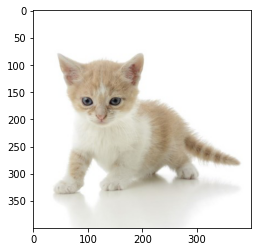

In [80]:
img_file = os.path.join(naver_dir, 'image001.jpg')
img = Image.open(img_file)
plt.imshow(img)